In [ ]:
import os
import shutil
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap

In [ ]:
# Get the current working directory (where the notebook is located)
current_dir = os.getcwd()

# Add path to load results
results_dir = os.path.join(current_dir, "results")

# Add path to save analysis results
analysis_results_dir = os.path.join(current_dir, "analysis_results")

In [ ]:
def clear_or_create_directory(directory_path):
    """
    Clears all contents of the given directory if it exists.
    If it doesn't exist, creates the directory.
    """
    try:
        if os.path.exists(directory_path):
            print(f"Directory '{directory_path}' exists. Clearing contents...")
            for filename in os.listdir(directory_path):
                file_path = os.path.join(directory_path, filename)
                # Handle files, symlinks, and directories appropriately
                if os.path.isfile(file_path) or os.path.islink(file_path):
                    os.unlink(file_path)  # Delete file or symlink
                elif os.path.isdir(file_path):
                    shutil.rmtree(file_path)  # Recursively delete directory
            print(f"All contents of '{directory_path}' have been cleared.")
        else:
            print(f"Directory '{directory_path}' does not exist. Creating it...")
            os.makedirs(directory_path)  # Create the directory
            print(f"Directory '{directory_path}' has been created.")
    except Exception as e:
        print(f"Error processing directory '{directory_path}': {e}")


clear_or_create_directory(analysis_results_dir)

Directory '/Users/sherman/GitHub/pandemic-flu-spread/analysis_results' exists. Clearing contents...
All contents of '/Users/sherman/GitHub/pandemic-flu-spread/analysis_results' have been cleared.


In [ ]:
# read the data
histogram_results_df = pd.read_excel(
    os.path.join(results_dir, "histogram_results.xlsx")
)

state_over_time_results_df = pd.read_excel(
    os.path.join(results_dir, "state_over_time_results.xlsx")
)

In [ ]:
# for each metric in histogram_results_df['Metric'], create a new variable with the data for that metric
metrics = histogram_results_df["Metric"].unique()

for metric in metrics:
    globals()[f"{metric}_data"] = histogram_results_df[
        histogram_results_df["Metric"] == metric
    ]
    print(f"{metric}_data")

total_infections_data
total_deaths_data
peak_infections_data
total_days_data


In [ ]:
def plot_heatmap(data: pd.DataFrame, infections_rate: float, ax, vmin=None, vmax=None):
    """
    Plots a heatmap for the given data with social_distancing_start_day as the y-axis,
    mask_start_day as the x-axis, and Median as the values.

    Args:
        data (pd.DataFrame): The input data containing 'social_distancing_start_day', 'mask_start_day', and 'Median'.
        infection_rate (float): The infection rate to include in the title.
        ax (matplotlib.axes.Axes): The axes on which to plot the heatmap.
        vmin (float): Minimum value for the color scale.
        vmax (float): Maximum value for the color scale.
    """
    # Derive the dataset name from the Metric column
    dataset_name = (
        data["Metric"].iloc[0].replace("total_", "").replace("_", " ").capitalize()
    )

    # Pivot the data to create a matrix for the heatmap
    heatmap_data = data.pivot_table(
        index="social_distancing_start_day",
        columns="mask_start_day",
        values="Median",
        aggfunc="median",
    )

    # Plot the heatmap
    sns.heatmap(
        heatmap_data,
        annot=True,
        fmt=".1f",
        cmap="YlGnBu",
        cbar=False,
        ax=ax,
        vmin=vmin,
        vmax=vmax,
    )
    ax.set_title(f"Median {dataset_name}\nInfection Rate: {infection_rate}")
    ax.set_xlabel("Mask Start Day")
    ax.set_ylabel("Social Distancing Start Day")

In [ ]:
for metric in metrics:
    print(f"Metric: {metric}")
    infection_rates = histogram_results_df["infection_rate"].unique()
    num_plots = len(infection_rates)

    # Create a 3-row by 2-column subplot layout
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))
    axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

    # Determine the global min and max for the color scale within the same metric
    metric_data = globals()[f"{metric}_data"]
    vmin = metric_data["Median"].min()
    vmax = metric_data["Median"].max()

    for i, infection_rate in enumerate(infection_rates):
        if i < len(axes):
            total_data = globals()[f"{metric}_data"]
            data = total_data.loc[total_data["infection_rate"] == infection_rate].copy()
            plot_heatmap(
                data, infections_rate=infection_rate, ax=axes[i], vmin=vmin, vmax=vmax
            )

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Add a single color bar at the bottom
    cbar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.02])
    fig.colorbar(
        plt.cm.ScalarMappable(cmap="YlGnBu", norm=plt.Normalize(vmin=vmin, vmax=vmax)),
        cax=cbar_ax,
        orientation="horizontal",
    )
    cbar_ax.set_xlabel("Median Infections")

    # Suppress specific warning
    warnings.filterwarnings("ignore", category=UserWarning, message=".*tight_layout.*")

    plt.tight_layout(rect=[0, 0.1, 1, 0.95])

    # Save the figure
    fig.savefig(os.path.join(analysis_results_dir, f"{metric}_heatmaps.png"))
    plt.close(fig)

Metric: total_infections
Metric: total_deaths
Metric: peak_infections
Metric: total_days


In [ ]:
# combine mask_start_day and social_distancing_start_day as (mask_start_day, social_distancing_start_day)
state_over_time_results_df["mask_start_day, social_distancing_start_day"] = (
    state_over_time_results_df[["mask_start_day", "social_distancing_start_day"]].apply(
        tuple, axis=1
    )
)

In [ ]:
# for each state in state_over_time_results_df['State'], create a new variable with the data for that state
states = state_over_time_results_df["State"].unique()
for state in states:
    globals()[f"{state}_data"] = state_over_time_results_df[
        state_over_time_results_df["State"] == state
    ]
    print(f"{state}_data")

susceptible_data
immuned_data
infected_data
infectious_data
recovered_data
dead_data
cumulative_vac_one_data
cumulative_vac_two_data
cumulative_masked_data
vac_one_data
vac_two_data
masking_data
vaccine_supply_data


In [ ]:
# Define state titles
title_map = {
    "susceptible": " Expected Number of Susceptible Individuals as of Day X",
    "immuned": "Expected Number of Immuned Individuals as of Day X",
    "infected": "Expected Number of Infected Individuals as of Day X",
    "infectious": "Expected Number of Infectious Individuals as of Day X",
    "recovered": "Expected Number of Recovered Individuals as of Day X",
    "dead": "Expected Number of Dead Individuals as of Day X",
    "cumulative_vac_one": "Expected Number of Vaccinated Individuals (First Dose) as of Day X",
    "cumulative_vac_two": "Number of Vaccinated Individuals (Second Dose) as of Day X",
    "cumulative_masked": "Expected Number of Masked Individuals as of Day X",
    "vac_one": "Expected Number of New Daily Vaccinated Individuals (First Dose)",
    "vac_two": "Expected Number of New Daily Vaccinated Individuals (Second Dose)",
    "masking": "Expected Number of New Daily Masked Individuals",
    "vaccine_supply": "Number of New Daily Vaccine Doses",
}

In [ ]:
def plot_line_graphs(
    data: pd.DataFrame,
    infection_rates: list,
    title: str,
    save_path: str,
):
    """
    Plots line graphs with Day as the X-axis, Mean as the Y-axis, and each line representing a combination of
    mask_start_day and social_distancing_start_day for each infection_rate.
    All graphs are plotted in one image with a single legend at the bottom.

    Args:
        data (pd.DataFrame): The input data containing 'Day', 'Mean', 'infection_rate', 'mask_start_day', and 'social_distancing_start_day'.
        infection_rates (list): List of infection rates to plot.
        title (str): The title of the plot.
        save_path (str): The path to save the plot.
    """
    num_plots = len(infection_rates)
    ncols = 2
    nrows = (num_plots + 1) // ncols  # Calculate the number of rows needed

    fig, axes = plt.subplots(
        nrows=nrows,
        ncols=ncols,
        figsize=(15, 5 * nrows),
        sharex=True,
        sharey=True,
    )

    axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

    # Get a colormap
    base_colormap = plt.colormaps["tab10"]

    unique_combinations = data[
        ["mask_start_day", "social_distancing_start_day"]
    ].drop_duplicates()

    colormap = ListedColormap(
        base_colormap(np.linspace(0, 1, len(unique_combinations)))
    )

    for i, infection_rate in enumerate(infection_rates):
        ax = axes[i]
        subset = data[data["infection_rate"] == infection_rate]

        for j, (mask_start_day, social_distancing_start_day) in enumerate(
            unique_combinations.values
        ):
            line_data = subset[
                (subset["mask_start_day"] == mask_start_day)
                & (subset["social_distancing_start_day"] == social_distancing_start_day)
            ]
            ax.plot(
                line_data["Day"],
                line_data["Mean"],
                label=f"mask: {mask_start_day}, social: {social_distancing_start_day}",
                color=colormap(j),
            )

        ax.set_title(f"Infection Rate: {infection_rate}")
        ax.set_xlabel("Day")
        ax.set_ylabel("Number of Individuals")
        ax.grid(True)

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Add a single legend at the bottom
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(
        handles,
        labels,
        loc="lower right",
        ncol=2,
        title="(Mask Start Day, Social Distancing Start Day",
    )

    plt.tight_layout(rect=[0, 0.1, 1, 0.95])
    plt.suptitle(title, fontsize=16, fontweight="bold")
    # Save the plot
    plt.savefig(save_path)

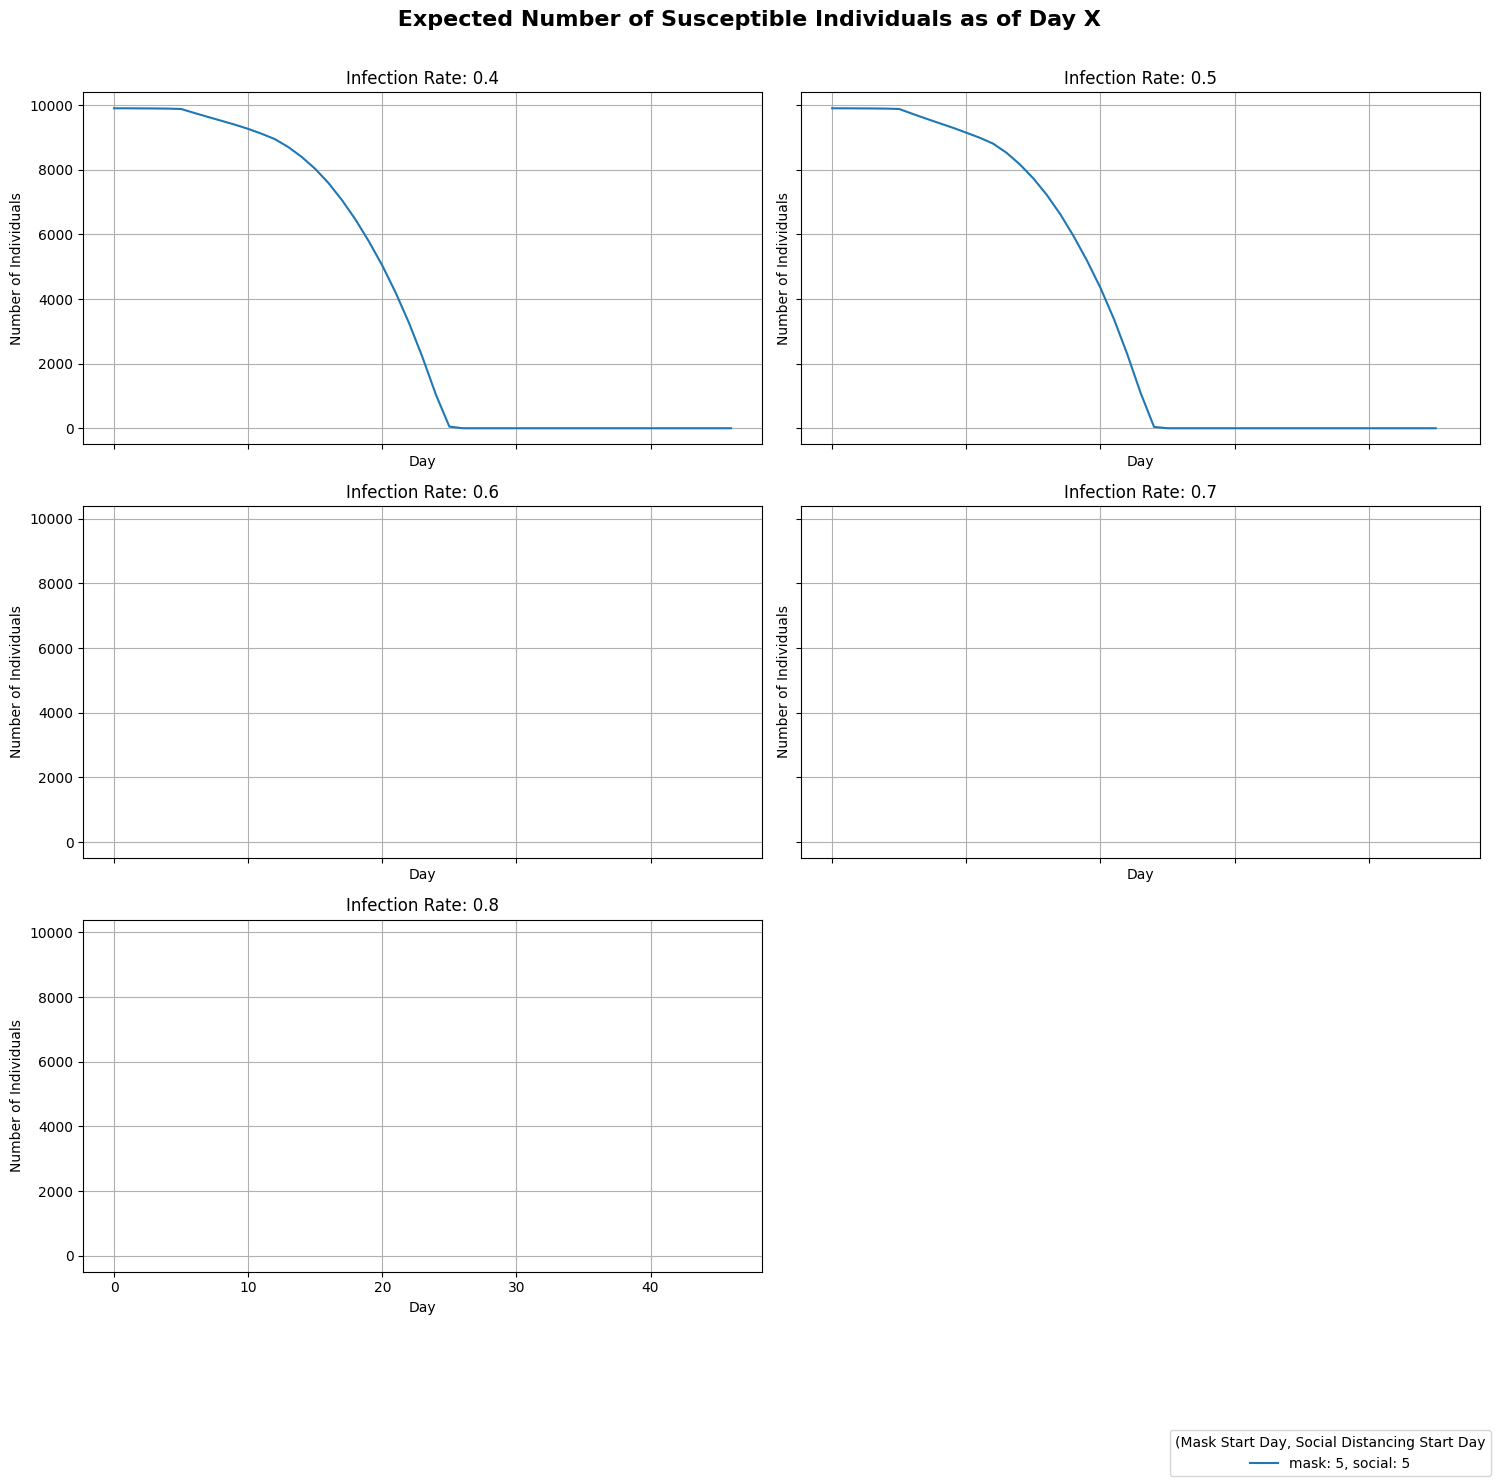

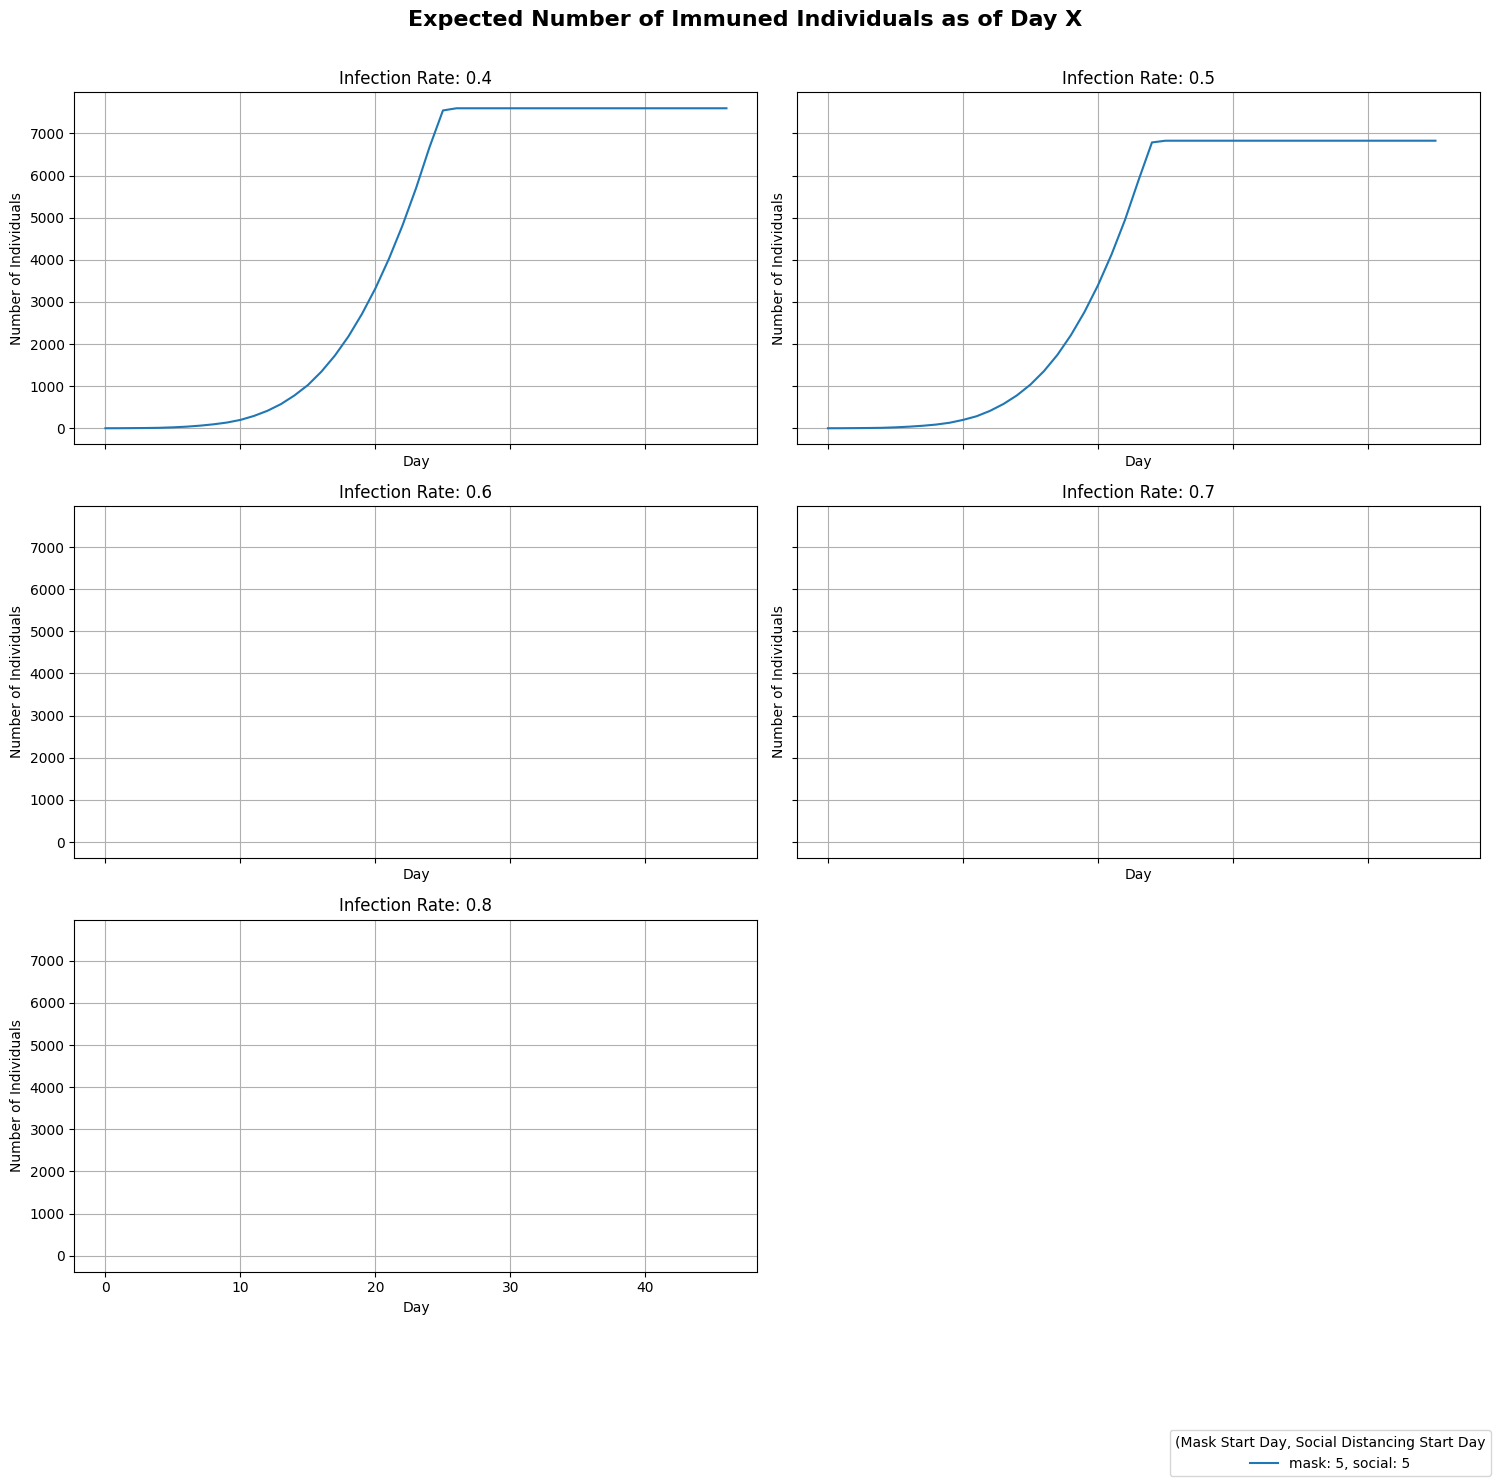

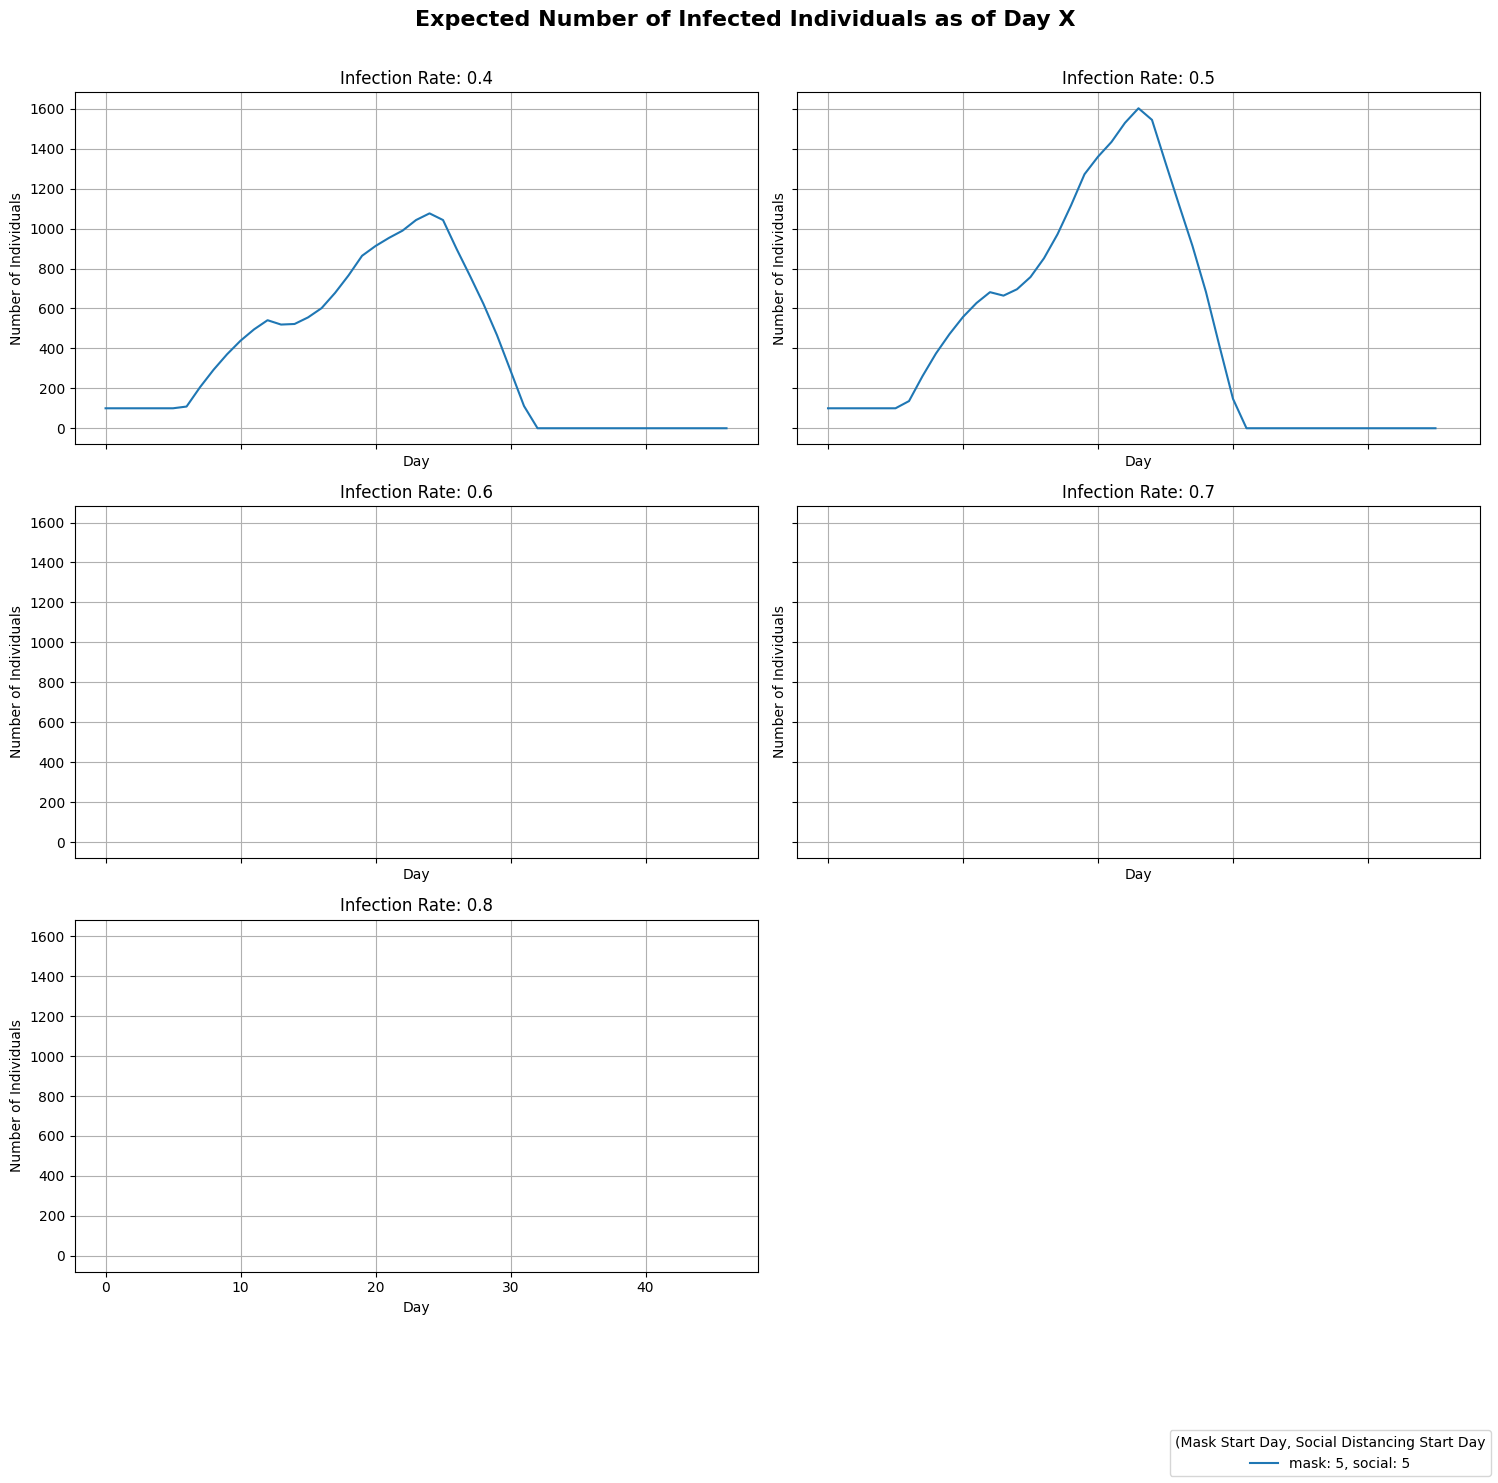

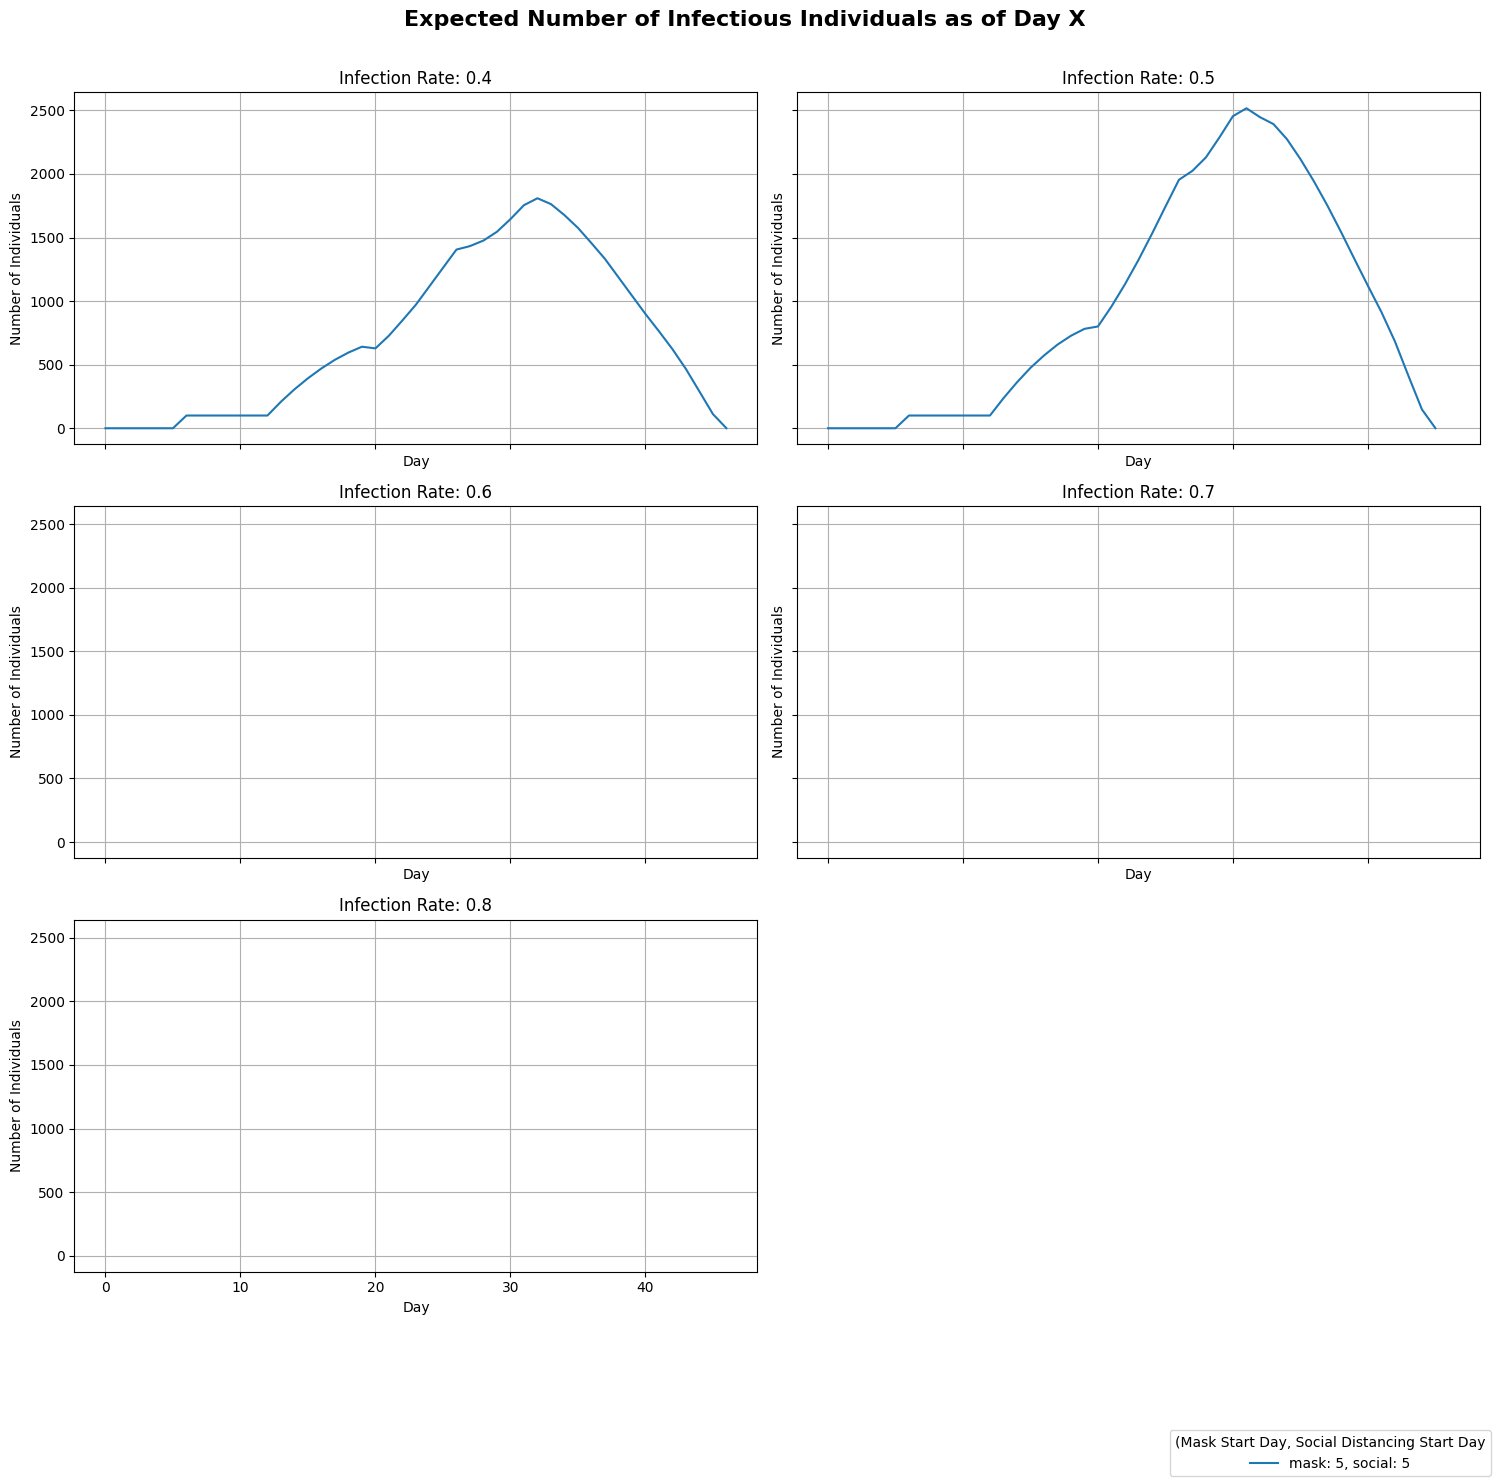

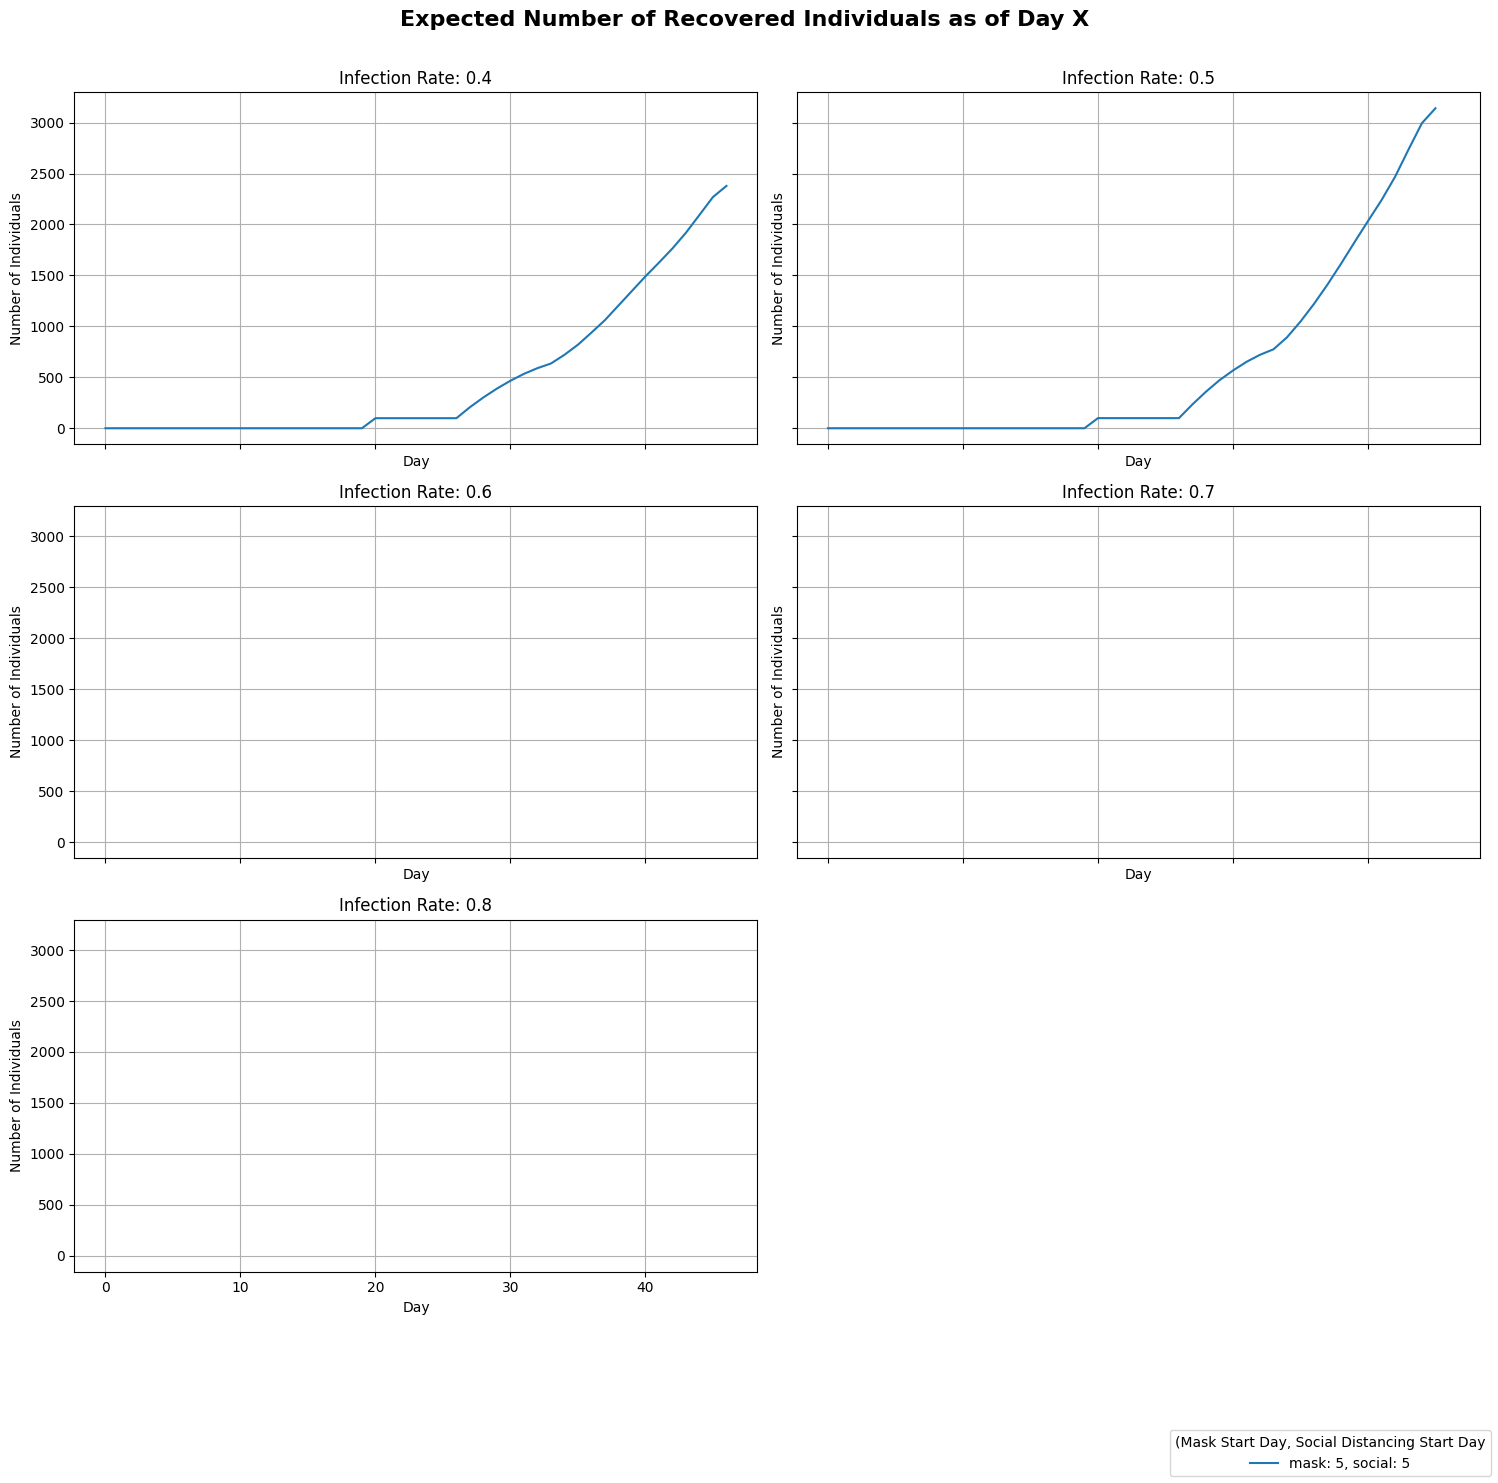

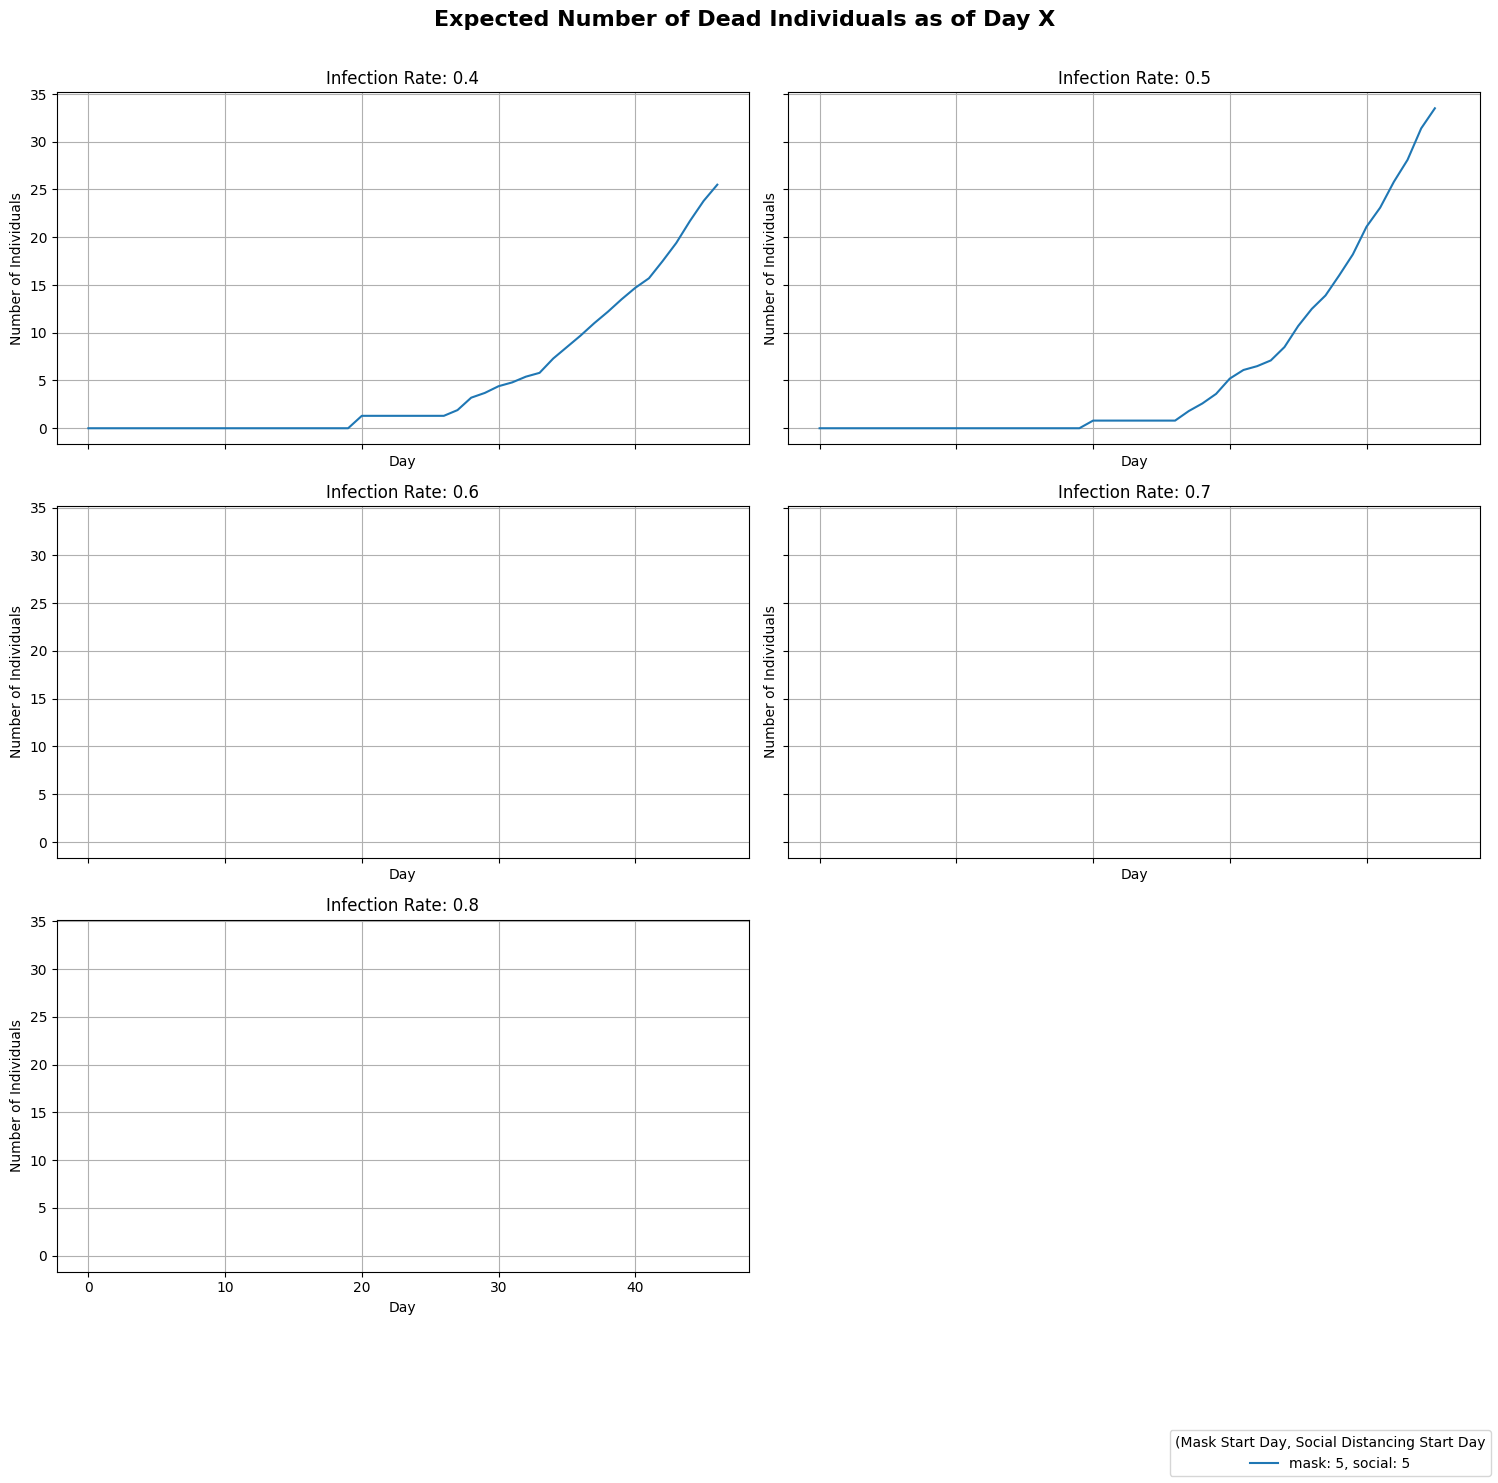

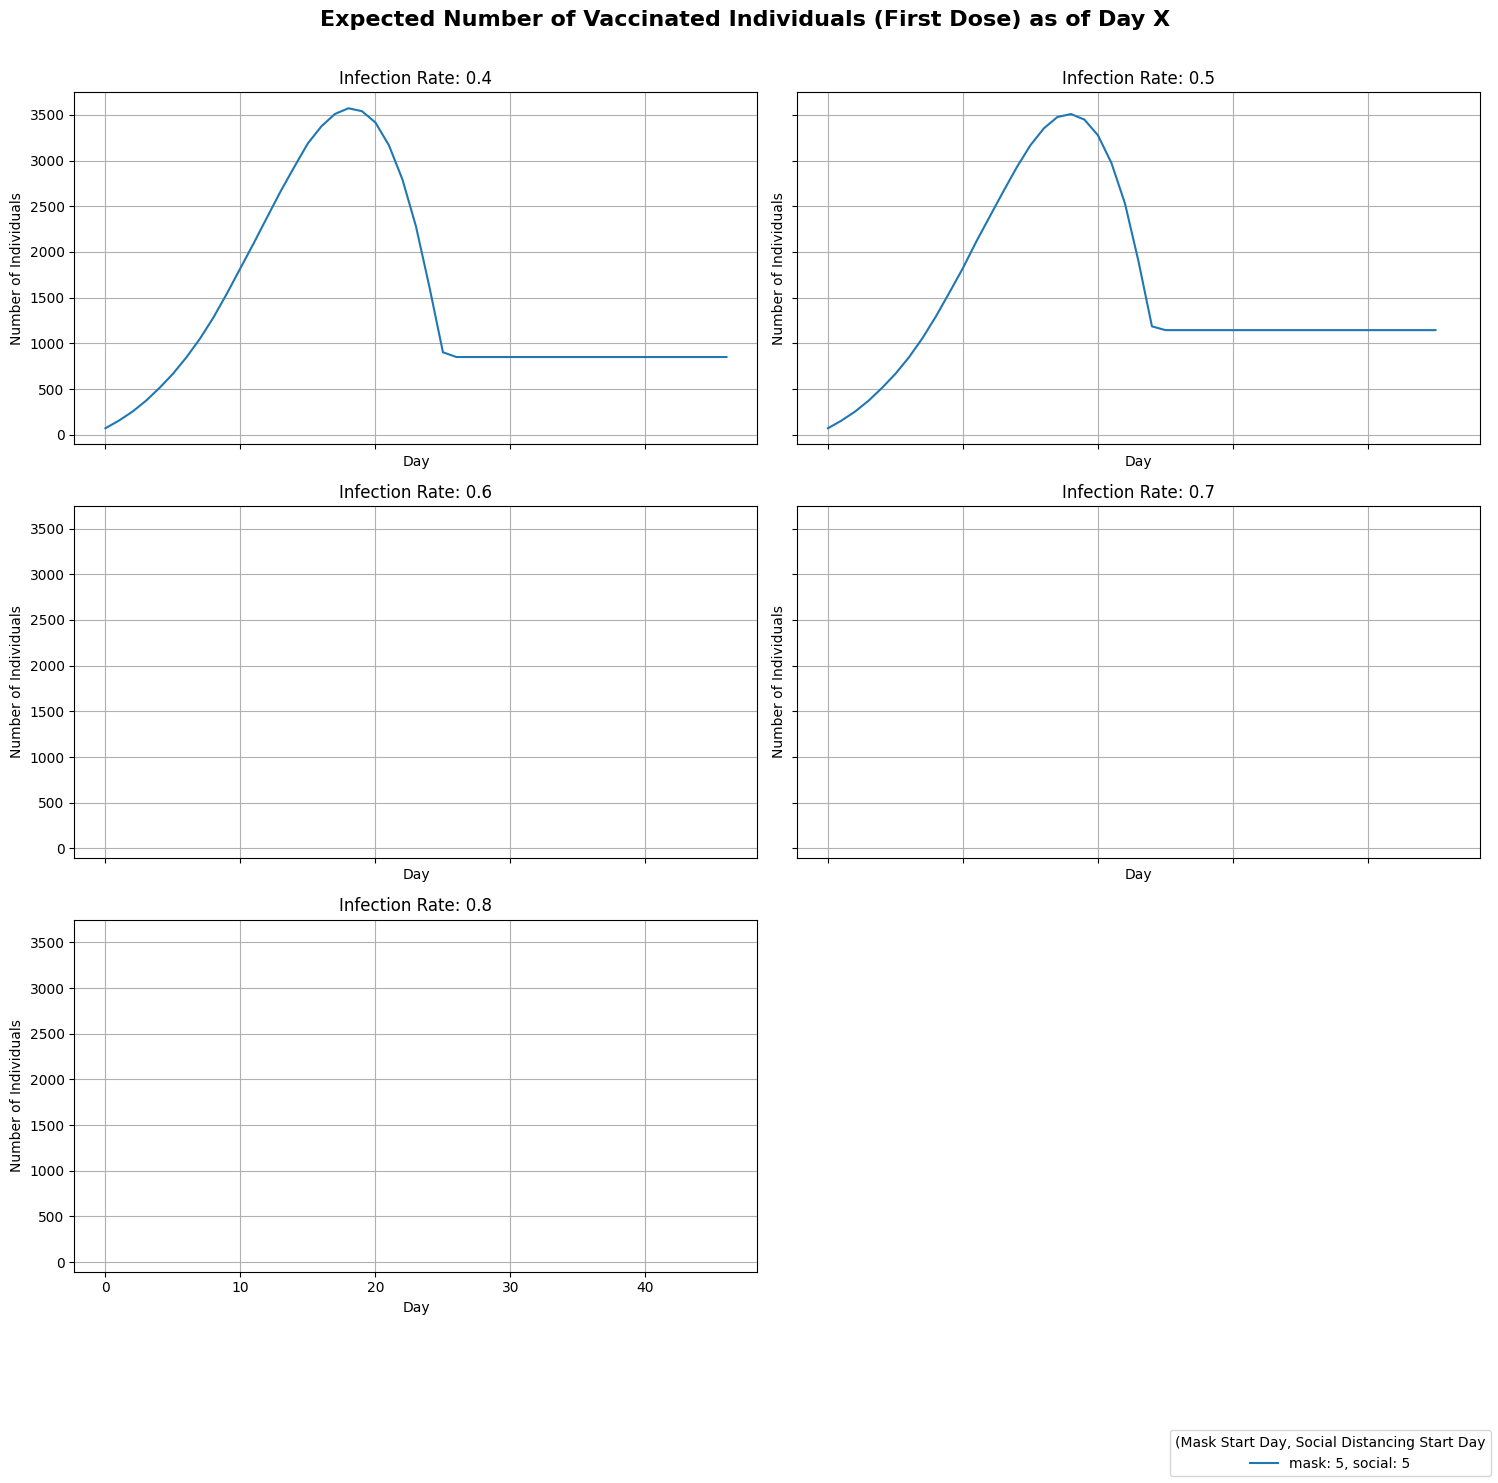

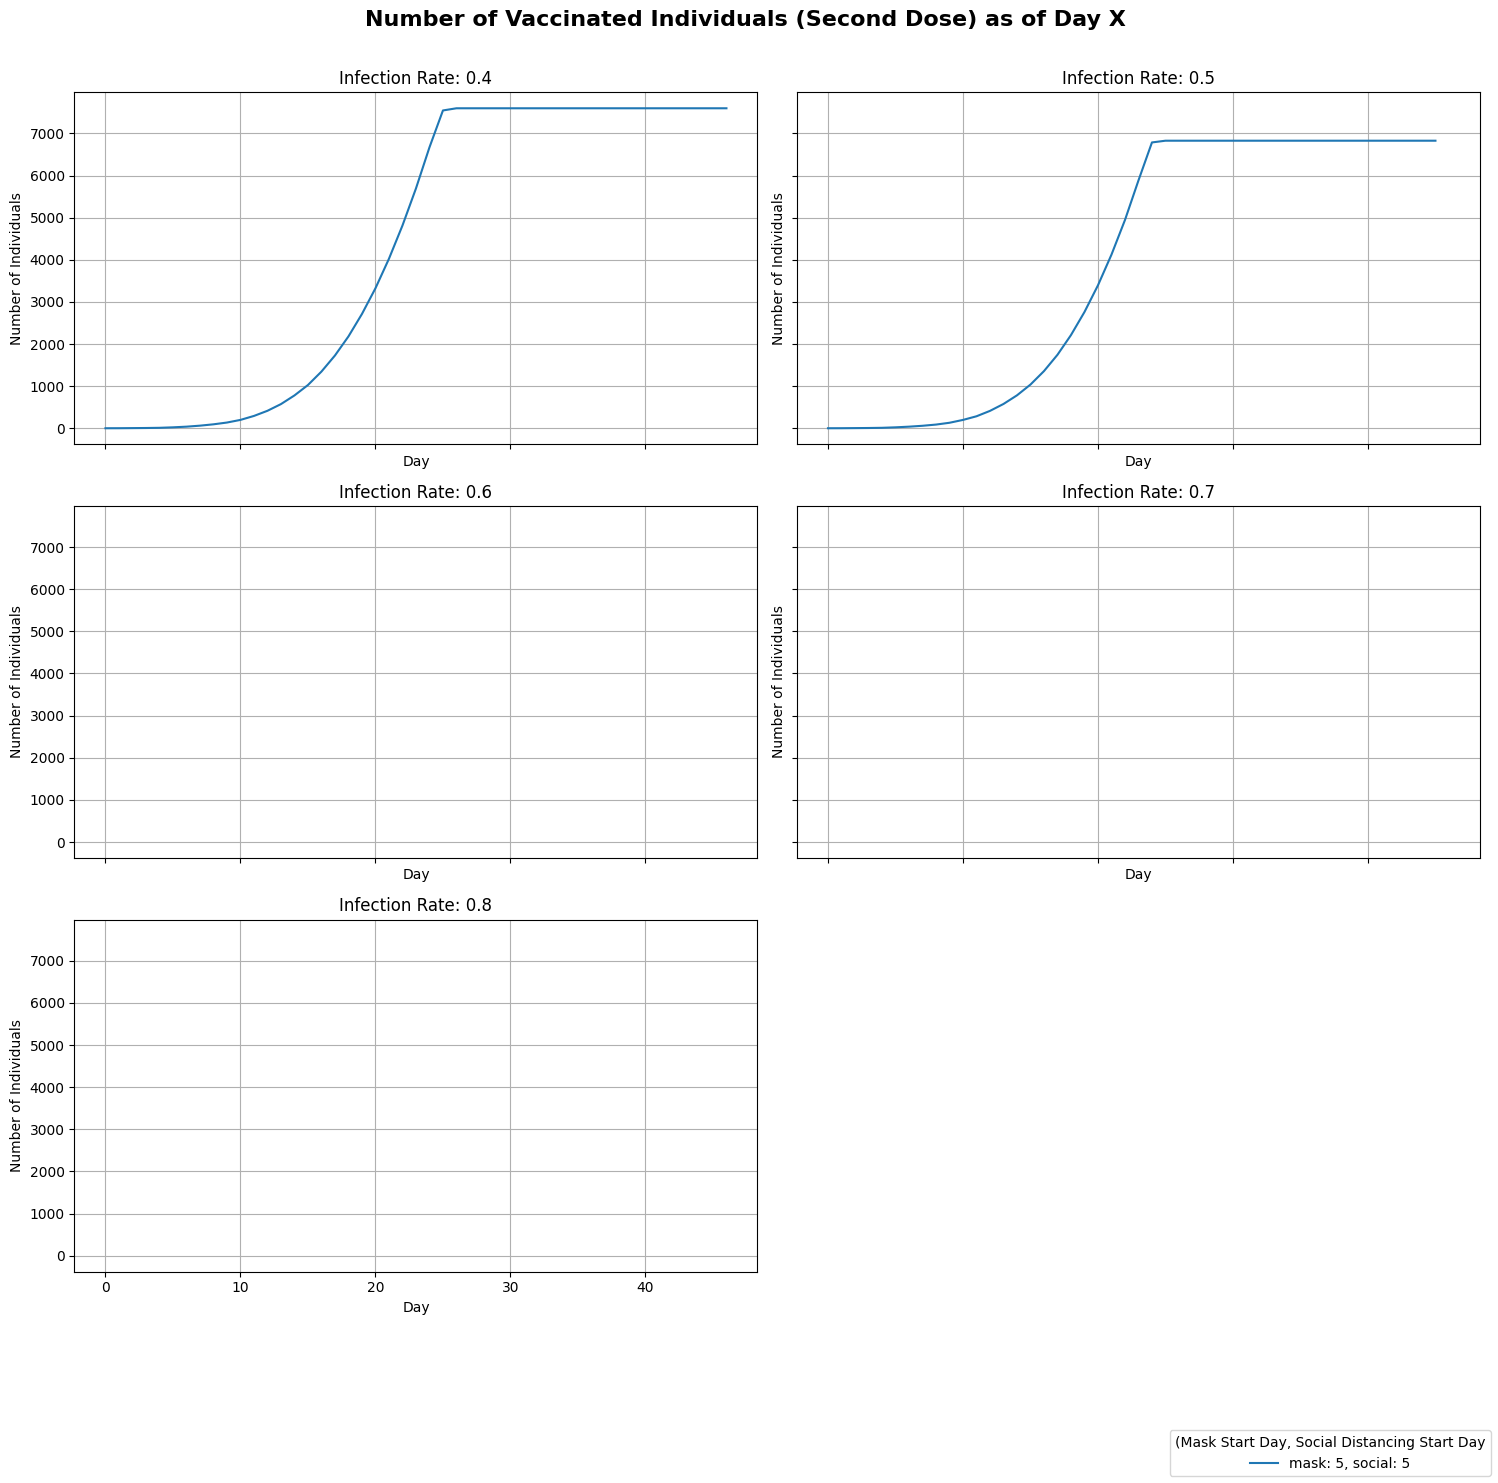

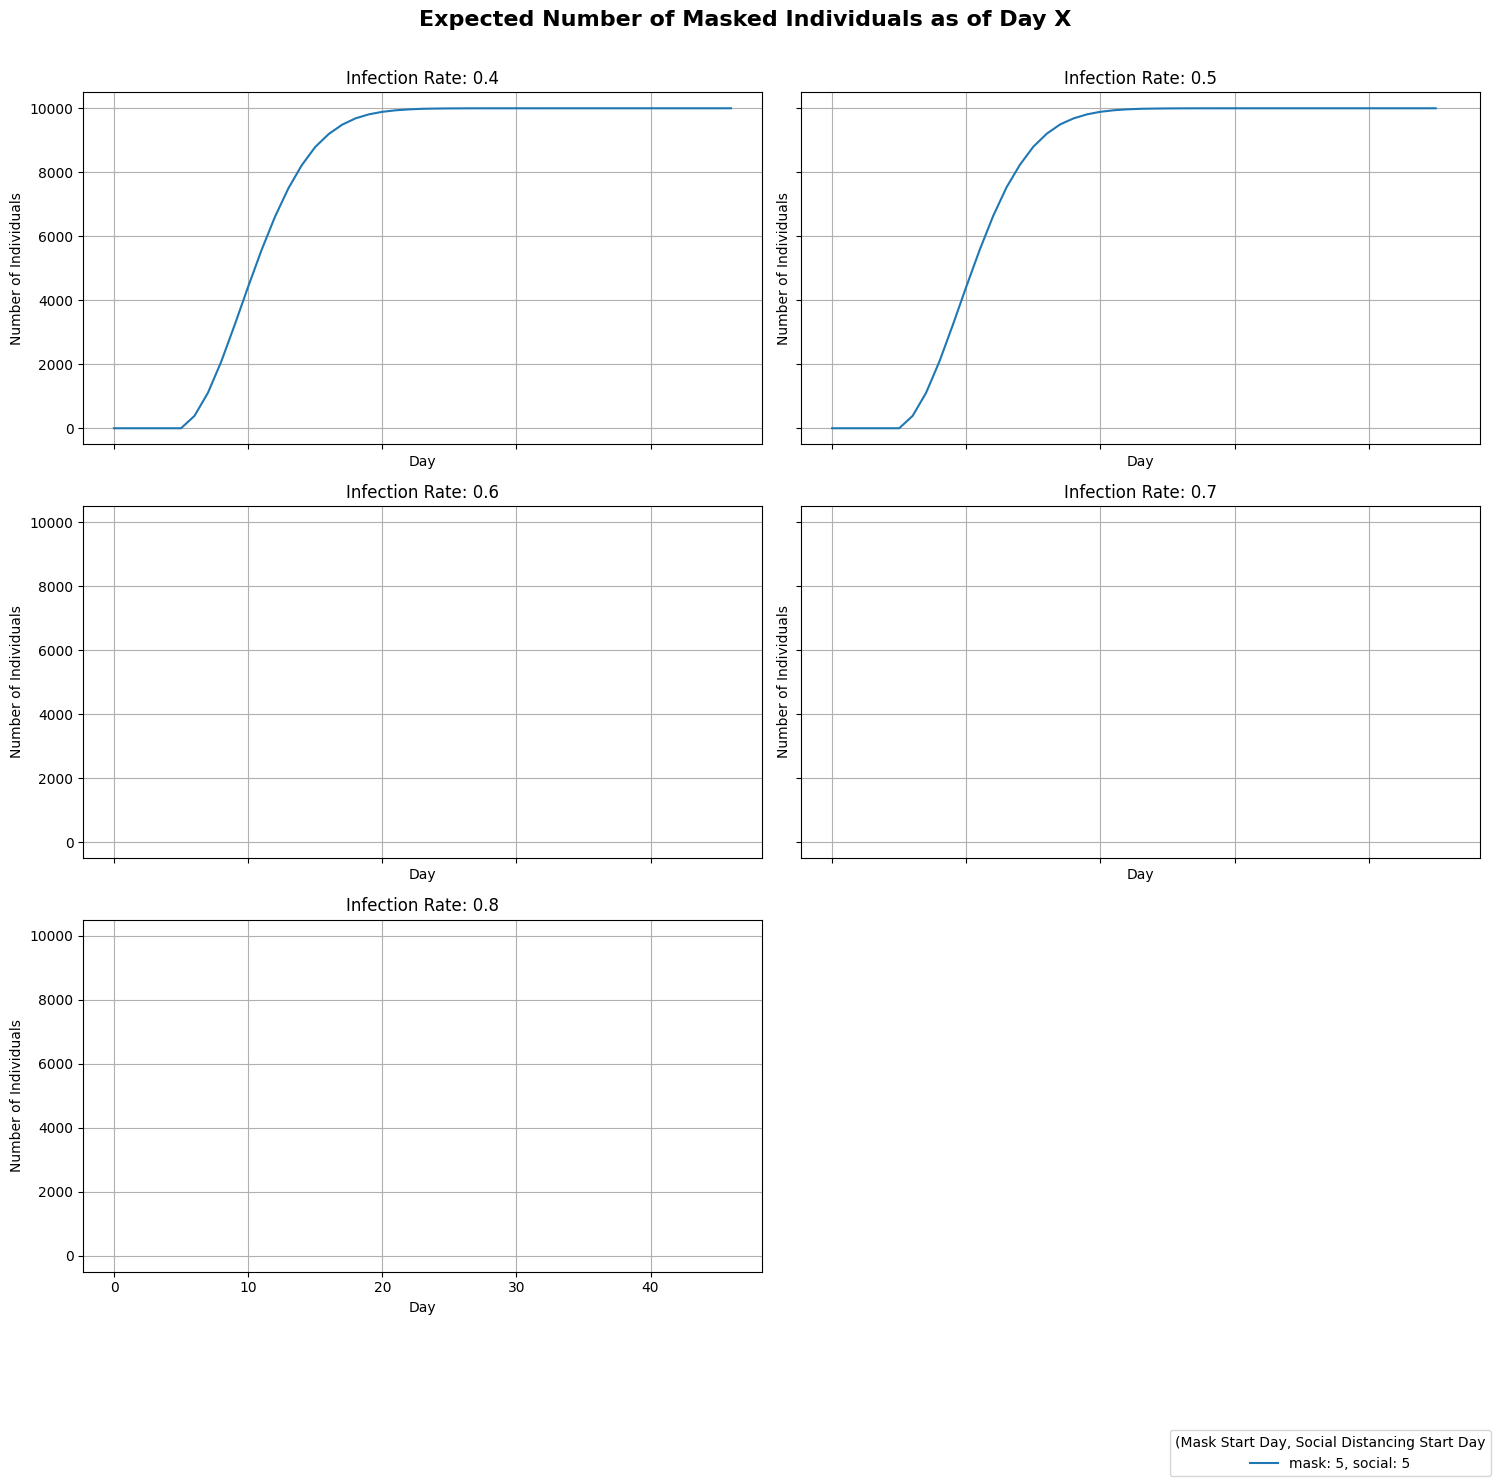

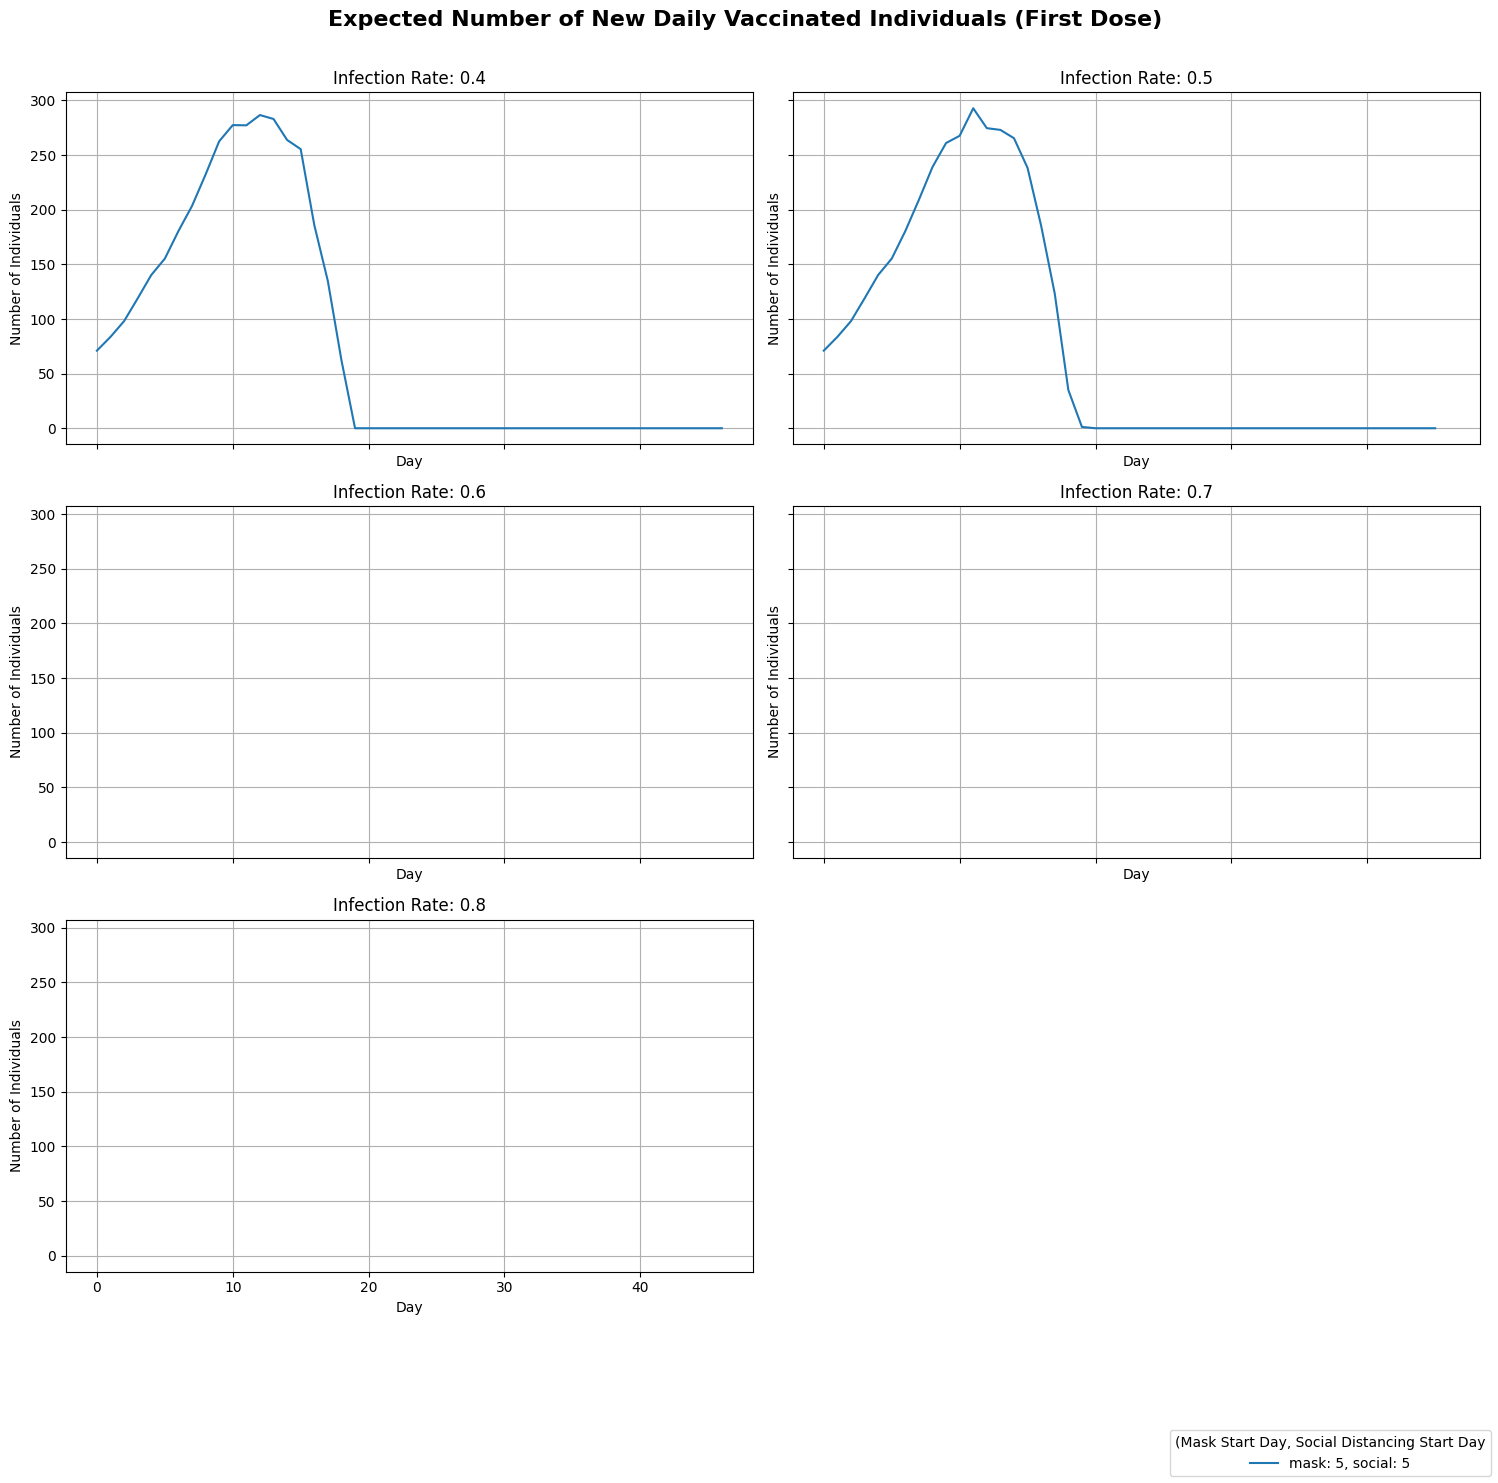

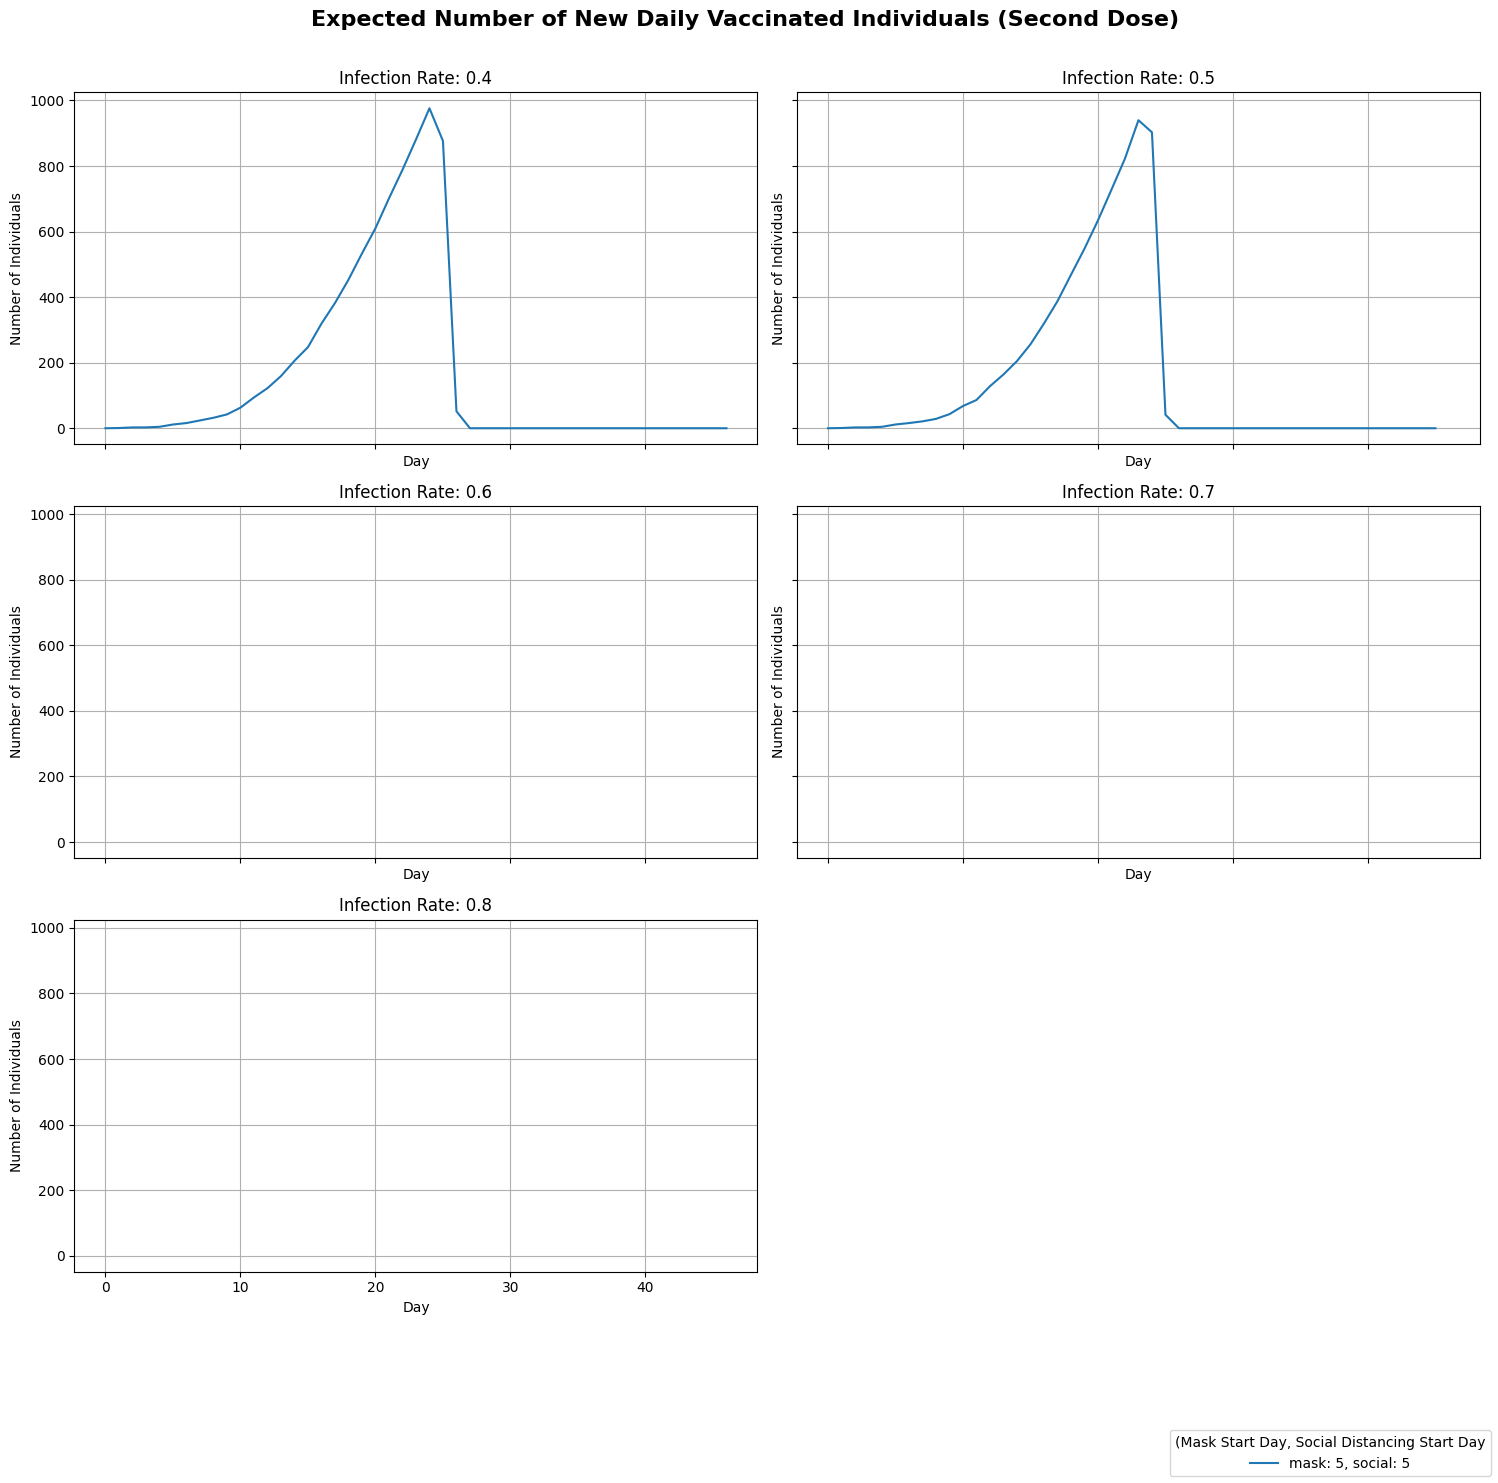

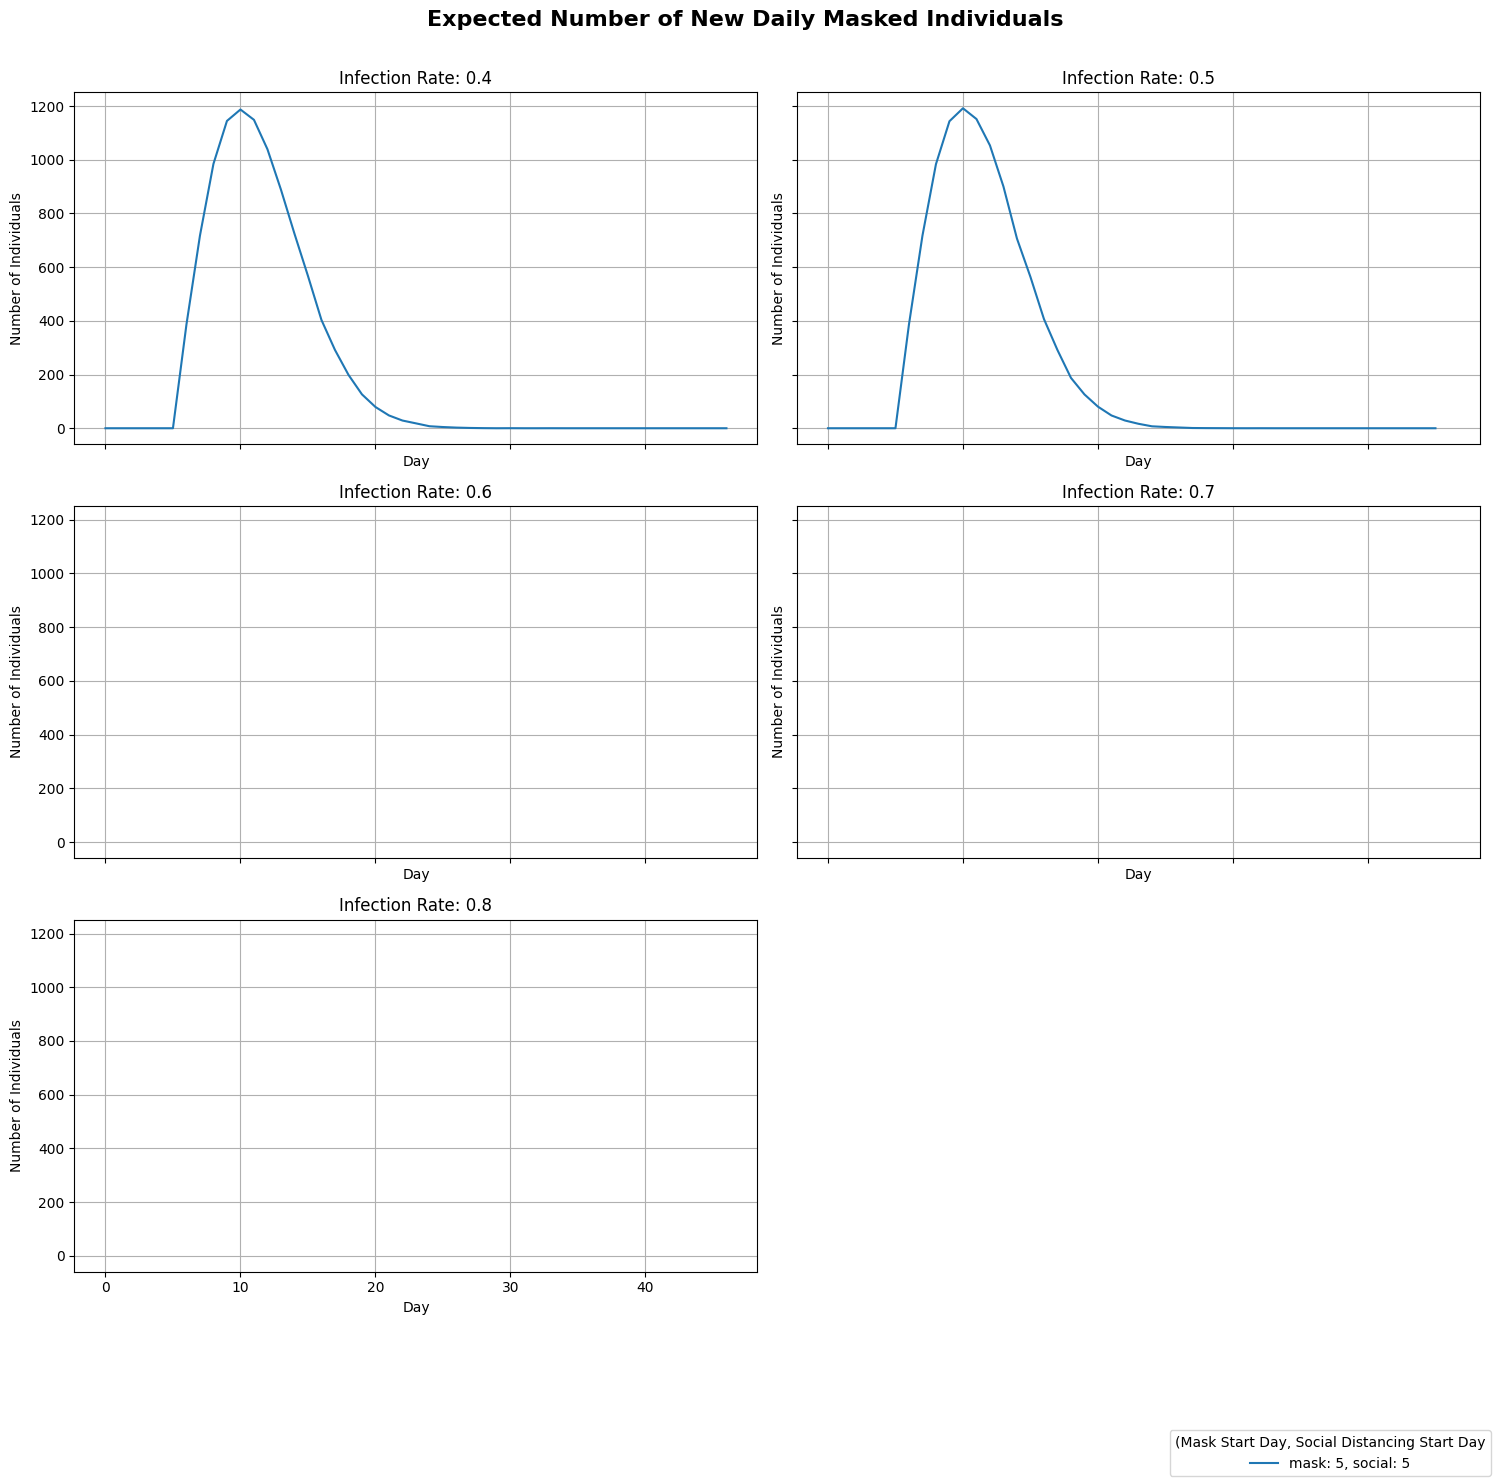

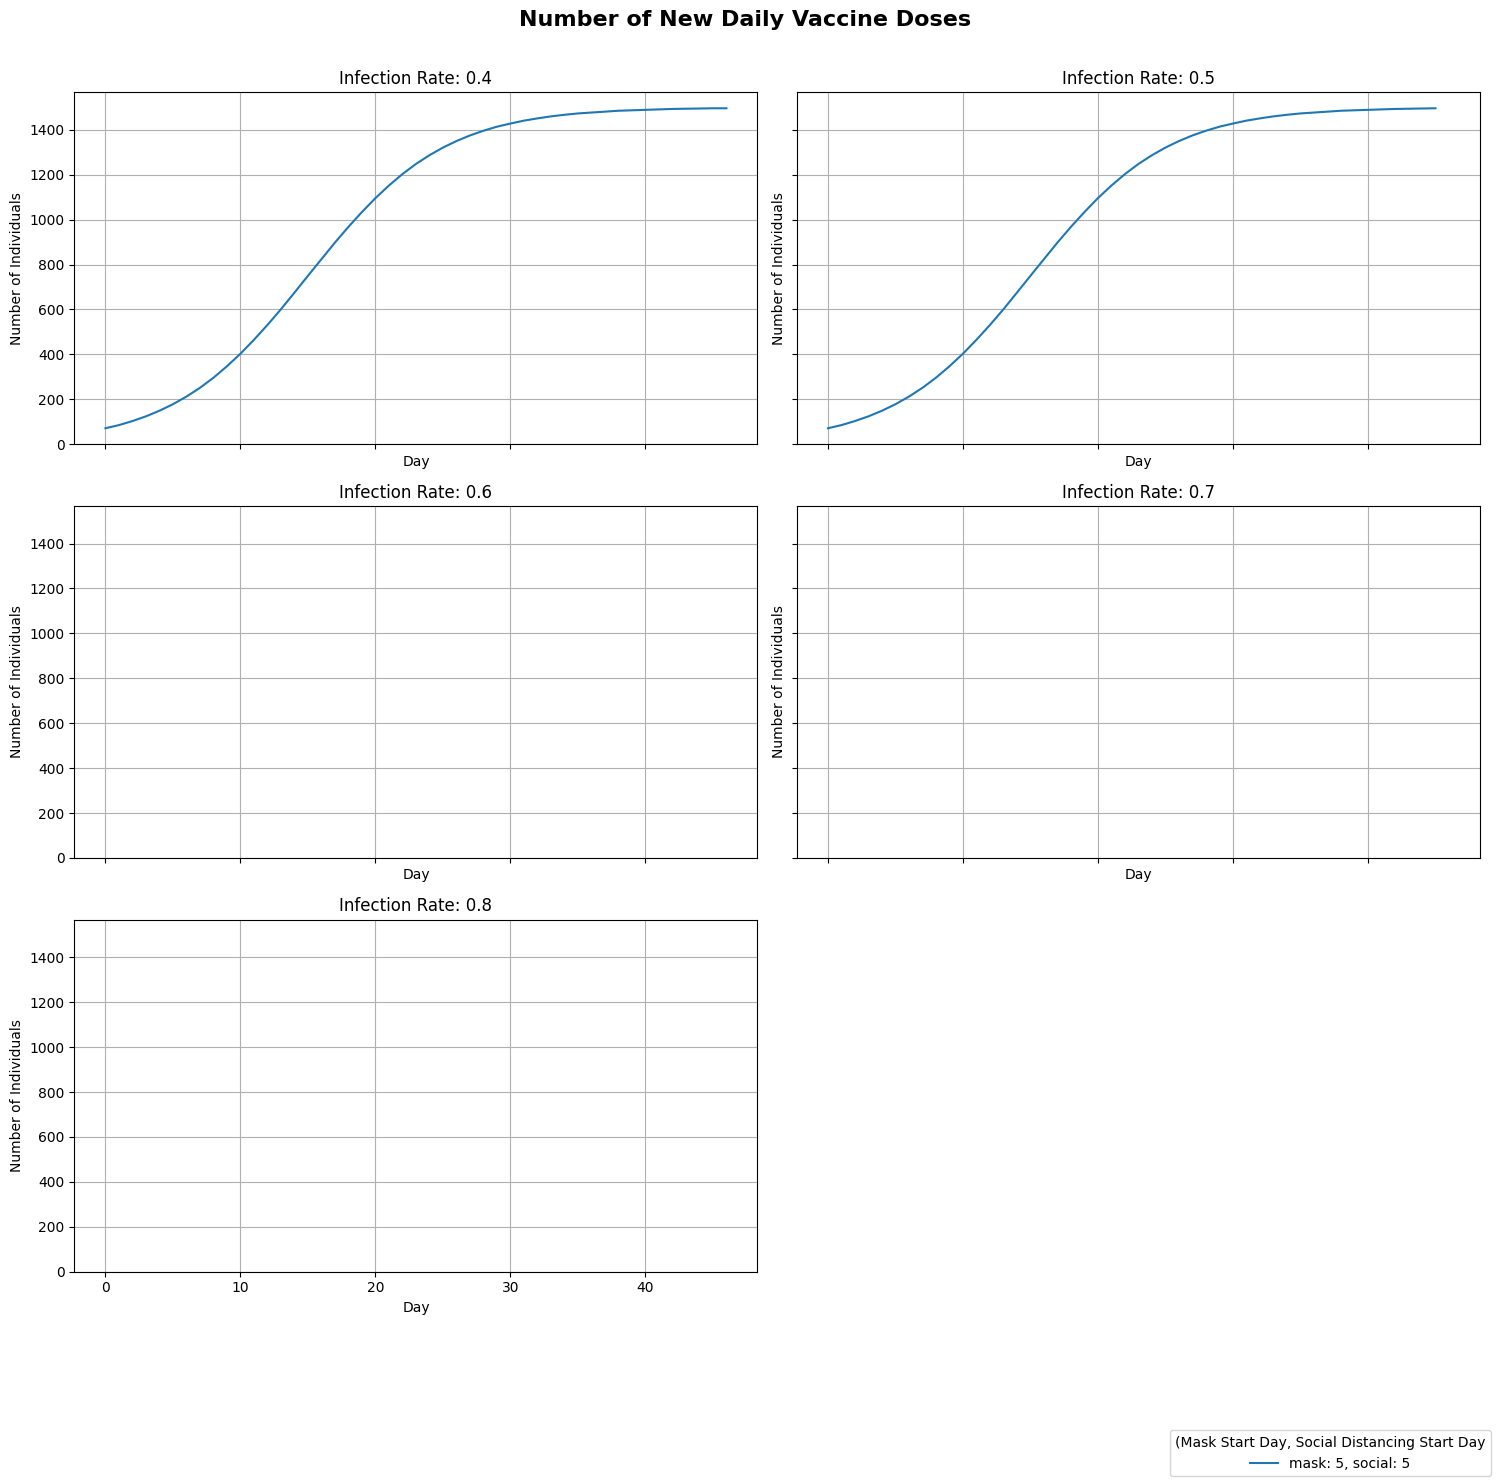

In [ ]:
infection_rates = [0.4, 0.5, 0.6, 0.7, 0.8]

for state in states:
    plot_line_graphs(
        globals()[f"{state}_data"],
        infection_rates,
        title=title_map[state],
        save_path=os.path.join(analysis_results_dir, state + ".png"),
    )